In [ ]:
!pip3 install numpy
!pip3 install keras
!pip3 install tensorflow-macos
!pip3 install matplotlib

In [28]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [29]:
# Splitting the data into the training and testing data
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0
print("Before encoding ---> ", train_Y[0])

# one hot encoding the 
train_Y = np.eye(10)[train_Y]
test_Y = np.eye(10)[test_Y]
print("After one-hot encoding ---> ", train_Y[0])

Before encoding --->  5
After one-hot encoding --->  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


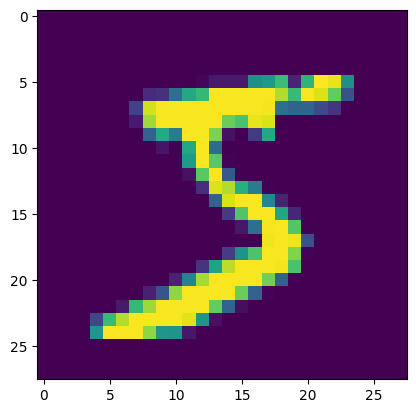

In [30]:
plt.imshow(train_X[0])

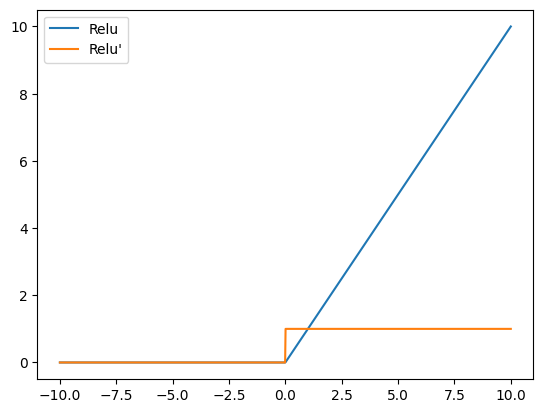

In [31]:
# relu actibation fucntion and the derivative
def relu(X):
    return np.maximum(0, X)

def relu_prime(X):
    return X > 0

x = np.linspace(-10, 10, 1000)

# plotting the function and the derivative
plt.plot(x, relu(x))
plt.plot(x, relu_prime(x))
plt.legend(['Relu', "Relu'"])

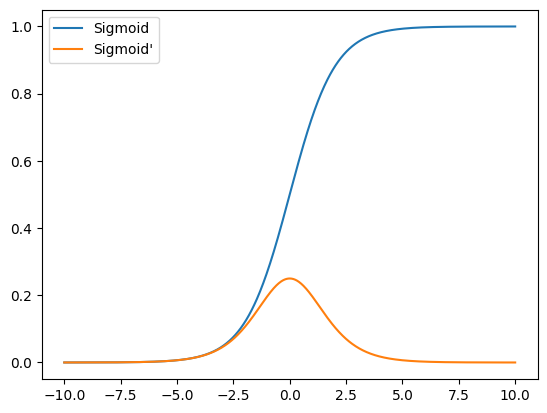

In [32]:
# sigmoid activation function
def sigmoid(X):
    return 1/(1+np.exp(-X))

def sigmoid_prime(X):
    return sigmoid(X)*(1-sigmoid(X))

x = np.linspace(-10,10,1000)
plt.plot(x, sigmoid(x))
plt.plot(x, sigmoid_prime(x))
plt.legend(['Sigmoid', "Sigmoid'"])

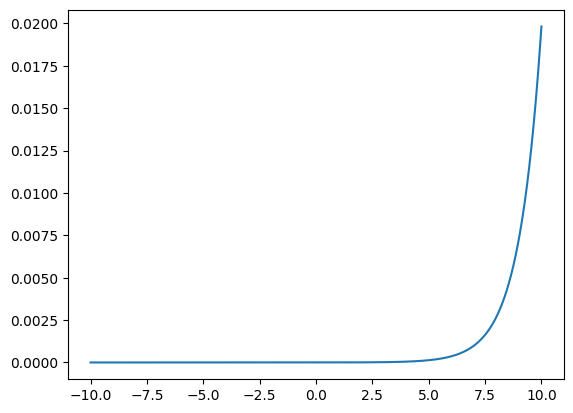

In [33]:
def softmax(x):
    """Compute softmax values for each row of x."""
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)

x = np.linspace(-10,10,1000)
plt.plot(x, softmax(x))

In [34]:
print(f"Shape before --> {train_X.shape}")
# reshaping the array to 1 x 784
train_X = np.reshape(train_X, (train_X.shape[0], 1, 784))
test_X = np.reshape(test_X, (test_X.shape[0], 1, 784))
print(f"Shape after --> {train_X.shape}")

Shape before --> (60000, 28, 28)
Shape after --> (60000, 1, 784)


In [35]:
# initializes the weights and biases
def init_vars():
    W1 = np.random.uniform(-1, 1, (784,256))
    b1 = np.zeros((1, 256))
    W2 = np.random.uniform(-1, 1, (256,10))
    b2 = np.zeros((1,10))

    return W1, b1, W2, b2

In [36]:
def forward(W1, W2, b1, b2, i):
    hidden = relu(np.dot(train_X[i], W1) + b1)
    output = softmax(np.dot(hidden, W2) + b2)
    
    return output

In [37]:
def cost(output):
    print("Cost function ---> ", np.sum((output - train_Y) ** 2) / len(train_Y))

In [ ]:
# forward pass
W1, b1, W2, b2 = init_vars()

for i in range(1000):
    output = forward(W1, W2, b1, b2, i)
    cost(output)
    # back propogation
